## Tunning de parametros

In [6]:
#Preparação dos dados

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pickle
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
from scipy.stats import f_oneway

In [7]:
with open('/home/nunesfi/Desktop/IA/files/Bases de dados-20230823T013645Z-001/Bases de dados/credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [8]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [9]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [10]:
# Concatenação dos dados, pois o algortimo de validação cruzada realiza a divisão dos dados automaticamente
x_credit = np.concatenate((x_credit_treinamento,x_credit_teste), axis=0)
x_credit.shape

(2000, 3)

In [11]:
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste), axis=0)
y_credit.shape

(2000,)

## Arvore de Decisão

In [12]:
parametros = {'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'min_samples_split': [2,5,10],
            'min_samples_leaf': [1,5,10]}

In [13]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_credit,y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


## Random Forest

In [14]:
parametros = {'criterion': ['gini', 'entropy'],
            'n_estimators': [10,40,100,150],
            'min_samples_split': [2,5,10],
            'min_samples_leaf': [1,5,10]}

In [15]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_credit,y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.9860000000000001


# KNN

In [16]:
parametros = {'n_neighbors': [3,5,10,20],
            'p': [1,2]}

In [17]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_credit,y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


## Regressão Logísitica

In [18]:
parametros = {'tol': [0.0001,0.00001,0.000001],
            'C': [1.0,1.5,2.0],
            'solver': ['lbfgs', 'sag', 'saga']}

In [19]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_credit,y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


## SVM

In [20]:
parametros = {'tol': [0.001,0.0001,0.00001],
            'C': [1.0,1.5,2.0],
            'kernel': ['rbf', 'linear','poly', 'sigmoid']}

In [21]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_credit,y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


## Redes Neurais

In [22]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
            'solver': ['adam', 'sgd'],
            'batch_size': [10,56]}

In [23]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_credit,y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9970000000000001


## Validação Cruzada

In [25]:
resultados_arvore = []
resultados_random_forest = []
resultados_svm = []
resultados_rede_neural = []
resultados_knn = []
resultados_regressao_logistica = []

for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit,y_credit, cv = kfold)
    #print(scores)
    #print(scores.mean())
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv =kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv = kfold)
    resultados_regressao_logistica.append(scores.mean())

    svm = SVC(kernel='rbf', C = 2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural,x_credit,y_credit,cv=kfold)
    resultados_rede_neural.append(scores.mean())

0


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


3


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


5


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


6


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


7


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


8


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


9


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


10


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


11


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


12


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


13


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


14


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


15


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


16


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


17


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


18


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


19


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


20


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


21


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


22


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


23


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


24


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


25


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


26


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


27


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


28


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


29


/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
resultados_arvore

[0.986,
 0.9844999999999999,
 0.9905000000000002,
 0.9875,
 0.9890000000000001,
 0.9884999999999999,
 0.9884999999999999,
 0.9875,
 0.9870000000000001,
 0.9875,
 0.9860000000000001,
 0.9899999999999999,
 0.9889999999999999,
 0.9869999999999999,
 0.9825000000000002,
 0.9854999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.985,
 0.9865,
 0.9884999999999999,
 0.9869999999999999,
 0.9880000000000001,
 0.9884999999999999,
 0.9875,
 0.9855,
 0.9854999999999998,
 0.9880000000000001]

In [27]:
resultados = pd.DataFrame({'Arvore':resultados_arvore, 'Random_Forest': resultados_random_forest,
                            'KNN': resultados_knn, 'SVM': resultados_svm, 'Rede_Neural': resultados_rede_neural,
                            'Logística': resultados_regressao_logistica})
                        
resultados

,Arvore,Random_Forest,KNN,SVM,Rede_Neural,Logística
0,0.9860,0.9820,0.9815,0.9845,0.9975,0.9475
1,0.9845,0.9795,0.9800,0.9840,0.9975,0.9465
2,0.9905,0.9840,0.9795,0.9865,0.9980,0.9470
3,0.9875,0.9850,0.9780,0.9850,0.9970,0.9460
4,0.9890,0.9855,0.9820,0.9850,0.9975,0.9465
5,0.9885,0.9825,0.9780,0.9845,0.9970,0.9465
6,0.9885,0.9865,0.9805,0.9860,0.9965,0.9470
7,0.9875,0.9830,0.9800,0.9850,0.9980,0.9480
8,0.9870,0.9835,0.9795,0.9840,0.9960,0.9465
9,0.9875,0.9805,0.9820,0.9845,0.9975,0.9465


In [28]:
resultados.describe()

,Arvore,Random_Forest,KNN,SVM,Rede_Neural,Logística
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.983517,0.980050,0.985083,0.997100,0.946950
std,0.001799,0.001927,0.001533,0.001280,0.000563,0.000687
min,0.982500,0.978500,0.977000,0.982000,0.996000,0.945500
25%,0.986000,0.982500,0.979000,0.984125,0.996500,0.946500
50%,0.987500,0.983750,0.980000,0.985000,0.997000,0.947000
75%,0.988500,0.984875,0.981000,0.986375,0.997500,0.947500
max,0.990500,0.986500,0.982500,0.987500,0.998000,0.948500


In [29]:
resultados.var() #variação

Arvore           3.236782e-06
Random_Forest    3.715230e-06
KNN              2.350862e-06
SVM              1.639368e-06
Rede_Neural      3.172414e-07
Logística        4.715517e-07
dtype: float64

In [30]:
(resultados.std() / resultados.mean()) * 100 #coeficiente de variação

Arvore           0.182237
Random_Forest    0.195980
KNN              0.156446
SVM              0.129977
Rede_Neural      0.056488
Logística        0.072517
dtype: float64

## Teste de normalidade nos resultados

In [31]:
## teste de hipotese
alpha = 0.05
shapiro(resultados_arvore), shapiro(resultados_knn), shapiro(resultados_random_forest), shapiro(resultados_rede_neural), shapiro(resultados_regressao_logistica), shapiro(resultados_svm)

(ShapiroResult(statistic=0.9725951780039934, pvalue=0.6123460868579076),
 ShapiroResult(statistic=0.9584024823930501, pvalue=0.2818135378764127),
 ShapiroResult(statistic=0.95136406442402, pvalue=0.18387604392818352),
 ShapiroResult(statistic=0.899181614345381, pvalue=0.008020776873731863),
 ShapiroResult(statistic=0.9370947605502944, pvalue=0.07597949435132455),
 ShapiroResult(statistic=0.9622985607506823, pvalue=0.3541579284945434))

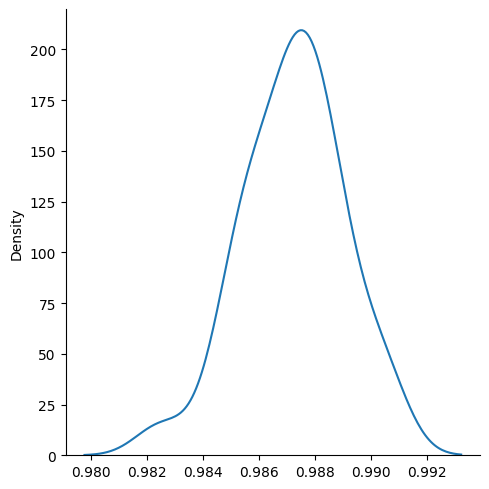

In [32]:
sns.displot(resultados_arvore, kind= 'kde');

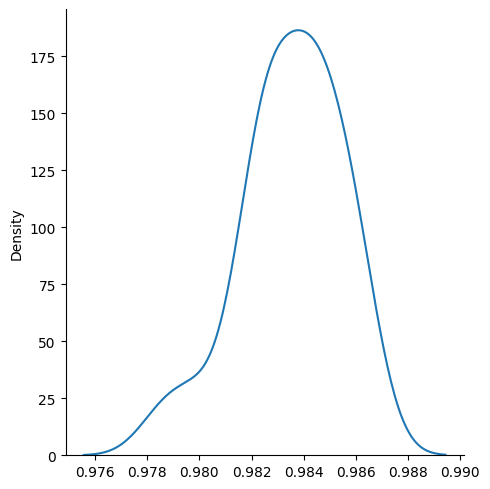

In [33]:
sns.displot(resultados_random_forest, kind= 'kde');

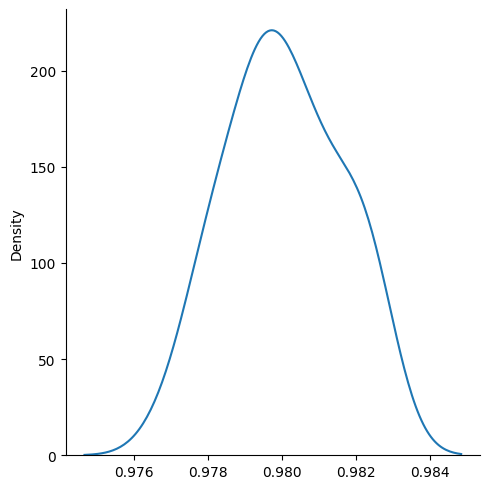

In [34]:
sns.displot(resultados_knn, kind= 'kde');

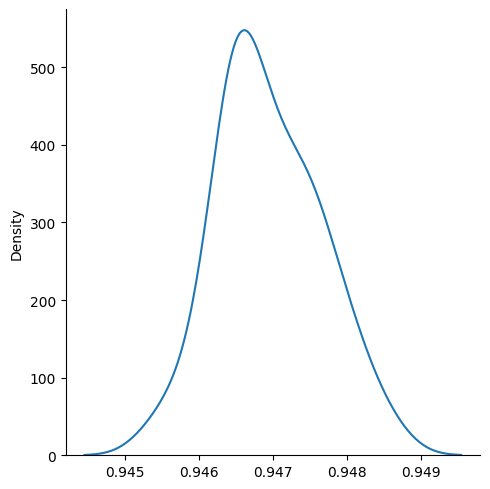

In [35]:
sns.displot(resultados_regressao_logistica, kind= 'kde');

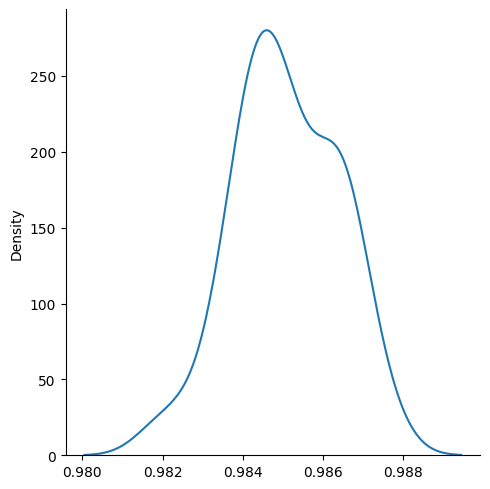

In [36]:
sns.displot(resultados_svm, kind= 'kde');

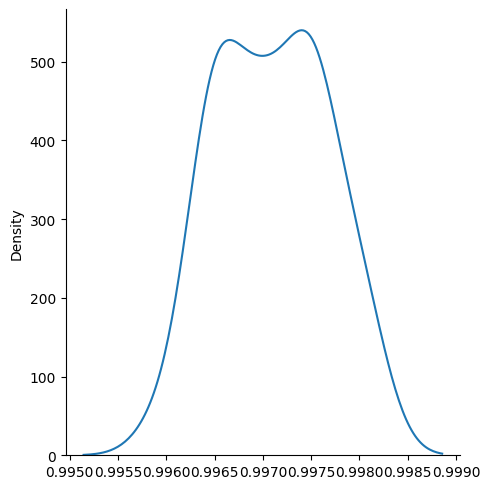

In [37]:
sns.displot(resultados_rede_neural, kind= 'kde');

## Teste de hipotese com ANOVA e Tukey

In [38]:
_, p = f_oneway(resultados_arvore, resultados_knn, resultados_random_forest, resultados_rede_neural, resultados_regressao_logistica, resultados_svm)

In [39]:
alpha - 0.05
if p <= alpha:
    print('hipótese nula rejeita. DAdos são diferentes')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais')

hipótese nula rejeita. DAdos são diferentes


In [47]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_regressao_logistica, resultados_knn, resultados_arvore, resultados_random_forest, resultados_rede_neural, resultados_svm]),
                        'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                    'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                                    'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                    'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                    'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                                    'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [52]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df.head()

,accuracy,algoritmo
0,0.9475,arvore
1,0.9465,arvore
2,0.9470,arvore
3,0.9460,arvore
4,0.9465,arvore


In [53]:
from statsmodels.stats.multicomp import MultiComparison

In [54]:
compara_algoritmos= MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [55]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   0.0403    0.0  0.0392  0.0413   True
       arvore     logistica   0.0366    0.0  0.0355  0.0376   True
       arvore random_forest   0.0331    0.0  0.0321  0.0341   True
       arvore   rede_neural   0.0381    0.0  0.0371  0.0392   True
       arvore           svm   0.0501    0.0  0.0491  0.0512   True
          knn     logistica  -0.0037    0.0 -0.0048 -0.0027   True
          knn random_forest  -0.0072    0.0 -0.0082 -0.0061   True
          knn   rede_neural  -0.0021    0.0 -0.0032 -0.0011   True
          knn           svm   0.0099    0.0  0.0088  0.0109   True
    logistica random_forest  -0.0035    0.0 -0.0045 -0.0024   True
    logistica   rede_neural   0.0016 0.0003  0.0005  0.0026   True
    logistica           svm   0.0136    0.0  0.0125  0.0146   

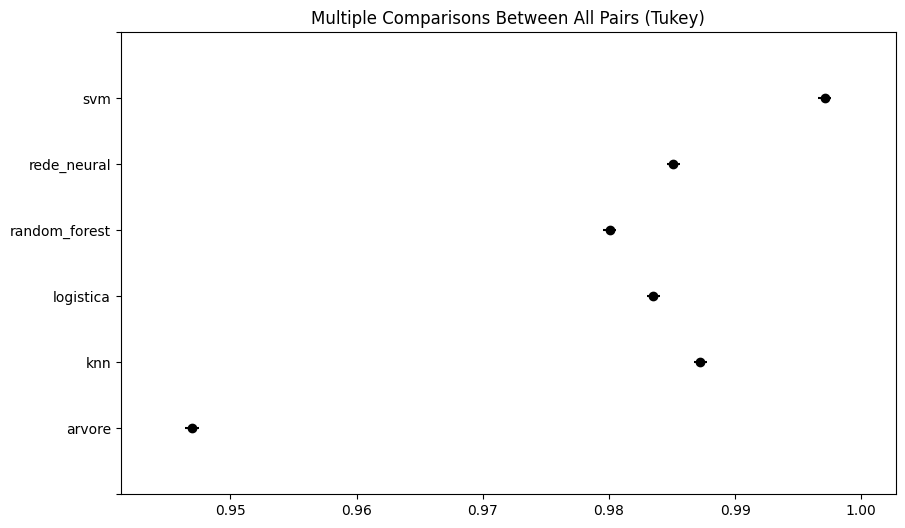

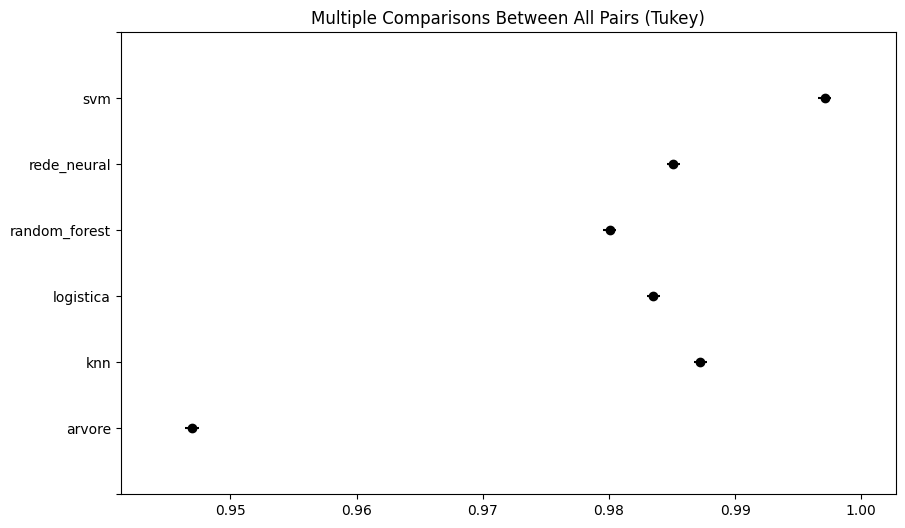

In [56]:
teste_estatistico.plot_simultaneous()

## Salvar classificador ja treinado

In [57]:
with open('/home/nunesfi/Desktop/IA/files/Bases de dados-20230823T013645Z-001/Bases de dados/credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [58]:
x_credit = np.concatenate((x_credit_treinamento,x_credit_teste), axis=0)
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste), axis=0)

In [59]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
classificador_rede_neural.fit(x_credit, y_credit)

/home/nunesfi/Desktop/IA/env_ia/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [60]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [91]:
classificador_svm = SVC(C=2.0, kernel='rbf', probability=True)
classificador_svm.fit(x_credit,y_credit)

SVC(C=2.0, probability=True)

In [92]:
#Salvando os classificadores
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

## Carregar um classificador já treinado

In [93]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [72]:
novo_registro = x_credit[1999]
novo_registro

array([-1.03572293, -0.93978122,  0.04244312])

In [73]:
novo_registro = novo_registro.reshape(1,-1)

In [74]:
rede_neural.predict(novo_registro)

array([1])

In [75]:
arvore.predict(novo_registro)

array([1])

In [76]:
svm.predict(novo_registro)

array([1])

## Combinação de classificadores

In [78]:
novo_registro = x_credit[1999]
novo_registro = novo_registro.reshape(1,-1)
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [79]:
resposta_rede_neural[0],resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [82]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
    nao_paga += 1
else:
    paga += 1

if resposta_arvore[0] == 1:
    nao_paga += 1
else:
    paga += 1

if resposta_svm[0] == 1:
    nao_paga += 1
else:
    paga += 1


if paga > nao_paga:
    print(' Cliente pagará o empréstimo')
elif paga == nao_paga:
    print('empate')
else:
    print('Cliente não pagará o emprestimo')

Cliente não pagará o emprestimo


## Rejeição de classificadores

In [83]:
novo_registro = x_credit[0]
novo_registro = novo_registro.reshape(1,-1)

In [84]:
resposta_rede_neural[0],resposta_arvore[0], resposta_svm[0]

(1, 1, 1)

In [85]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.0000000e+00, 2.0876708e-16]])

In [88]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

0.9999999999999998

In [90]:
probabilidade_arvores = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvores.max()
confianca_arvore

1.0

In [94]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9999978802005361

In [95]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
    algoritmos +=1
    if resposta_rede_neural[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if confianca_arvore >= confianca_minima:
    algoritmos +=1
    if resposta_arvore[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if confianca_svm >= confianca_minima:
    algoritmos +=1
    if resposta_svm[0] == 1:
        nao_paga += 1
    else:
        paga += 1


if paga > nao_paga:
    print(' Cliente pagará o empréstimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
    print('empate baseado em {} algortmos'.format(algoritmos))
else:
    print('Cliente não pagará o emprestimo, baseado em {} algoritmos'.format(algoritmos))

Cliente não pagará o emprestimo, baseado em 2 algoritmos
